##  项目介绍
### 数据包含消费者在线购买服装的消费金额，目的是分析是移动端APP的获利高还是PC端的获利高

In [15]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 加载对应数据

df = pd.read_csv('Ecommerce Customers')
df.head()    # 查看数据的前5行
df.columns   # 查看数据的所有列
df.describe(include = 'all')  # 查看所有列的基本信息

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,Teal,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


*可以看见在数据集中Email、Address、Avatar这三列中存在大量的唯一值，并且对于我们实现问题没有什么帮助，将其删除*

In [30]:
df.drop(columns = ['Email','Address','Avatar'],axis=1,inplace = True)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [32]:
# 数据的预处理（缺失值、空值、异常值）
df.isnull().sum()    # 缺失值统计

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Text(0.5, 1.0, 'Yearly Amount Spent')

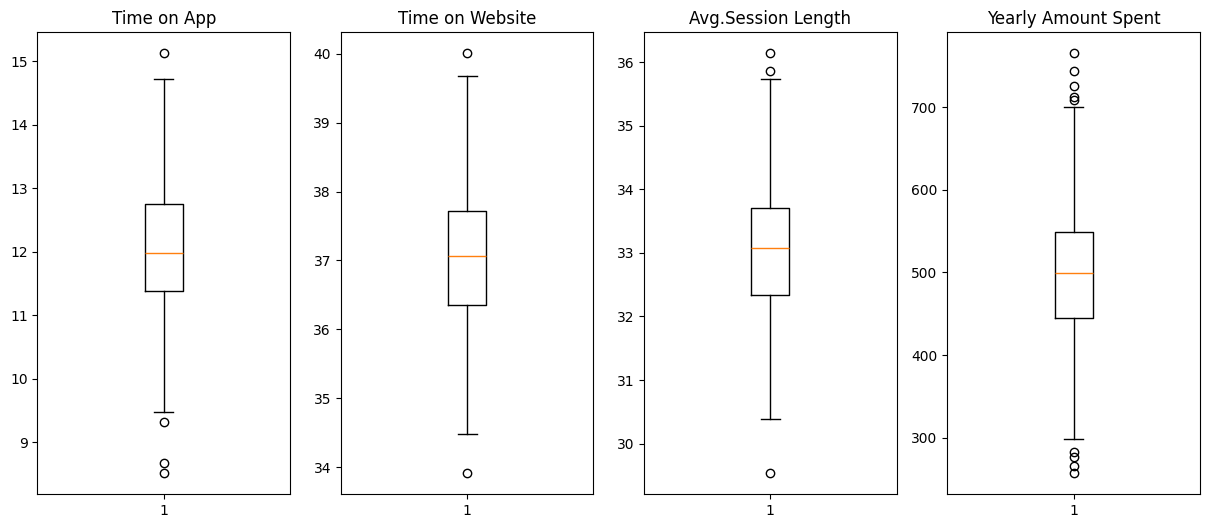

In [34]:
# 异常值的统计及其清洗
f , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,6))   # 绘制4个箱线图
ax1.boxplot(df['Time on App'])
ax1.set_title('Time on App')

ax2.boxplot(df['Time on Website'])
ax2.set_title('Time on Website')

ax3.boxplot(df['Avg. Session Length'])
ax3.set_title('Avg.Session Length')

ax4.boxplot(df['Yearly Amount Spent'])
ax4.set_title('Yearly Amount Spent')


<Axes: >

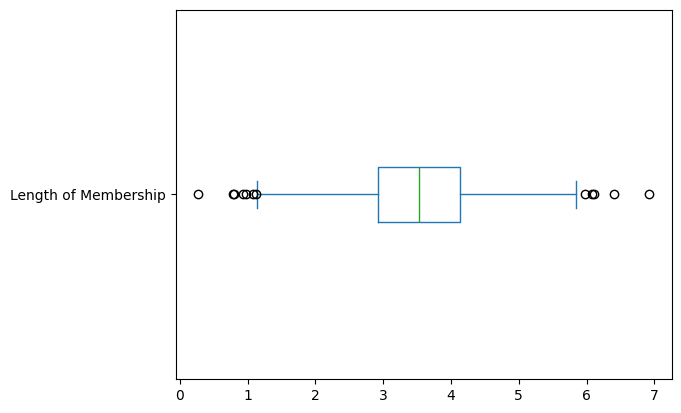

In [39]:
df['Length of Membership'].plot(kind='box',vert=False)

#### 可以看到每个列中都含有异常值，我们需要对异常值进行清除

In [40]:
# 使用IQR方法剔除异常值
Q1 = df.quantile(0.25)   # 计算df中的第一四分位数，表示有25%的数据小于等于该值
Q3 = df.quantile(0.75)   # 计算df中的第三四分位数，表示有75%的数据小于等于该值
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


####  再次查看经过处理后的异常值

Text(0.5, 1.0, 'Yearly Amount Spent')

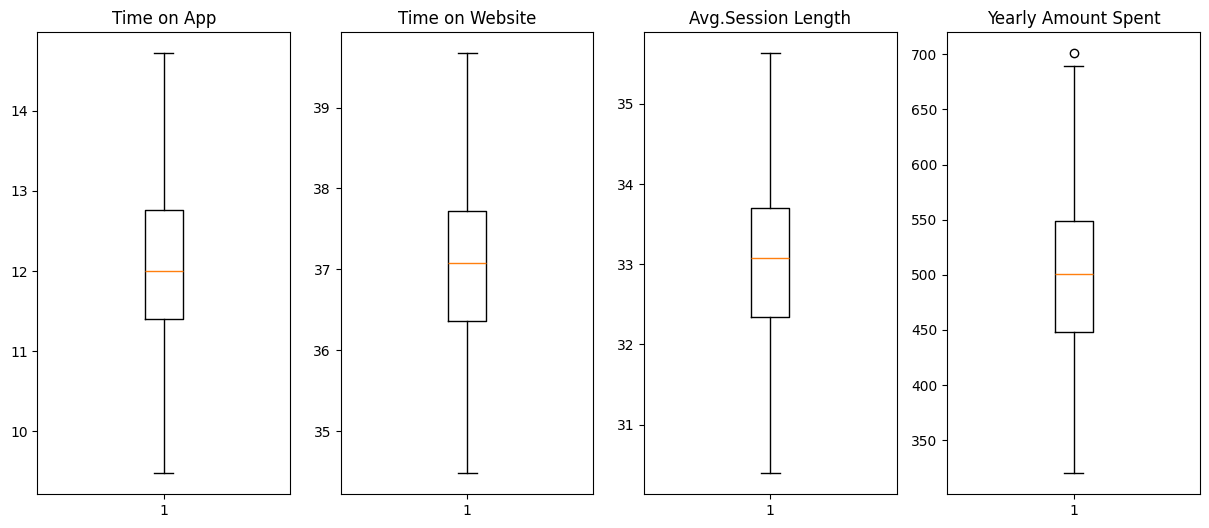

In [41]:
f , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,6))   # 绘制4个箱线图
ax1.boxplot(df['Time on App'])
ax1.set_title('Time on App')

ax2.boxplot(df['Time on Website'])
ax2.set_title('Time on Website')

ax3.boxplot(df['Avg. Session Length'])
ax3.set_title('Avg.Session Length')

ax4.boxplot(df['Yearly Amount Spent'])
ax4.set_title('Yearly Amount Spent')

<Axes: xlabel='Length of Membership', ylabel='Count'>

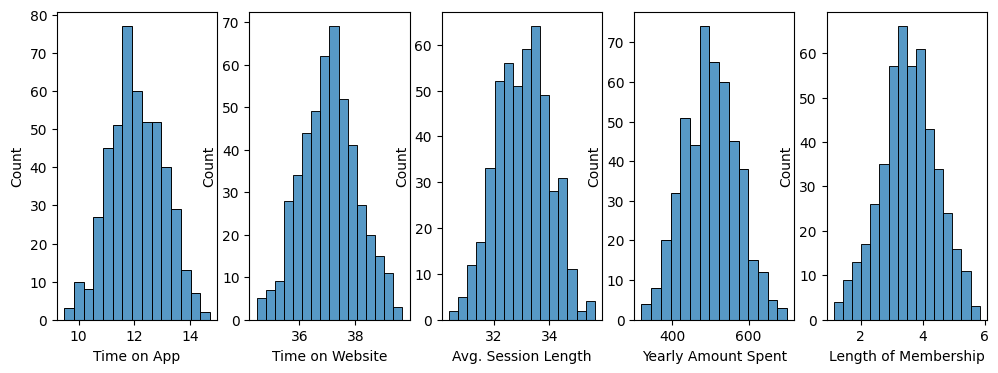

In [45]:
# 可视化分析查看数据是否符合正态分布
f , ax  = plt.subplots(1,5,figsize=(12,4))
sns.histplot(df['Time on App'],ax=ax[0])
sns.histplot(df['Time on Website'],ax=ax[1])
sns.histplot(df['Avg. Session Length'],ax=ax[2])
sns.histplot(df['Yearly Amount Spent'],ax=ax[3])
sns.histplot(df['Length of Membership'],ax=ax[4])

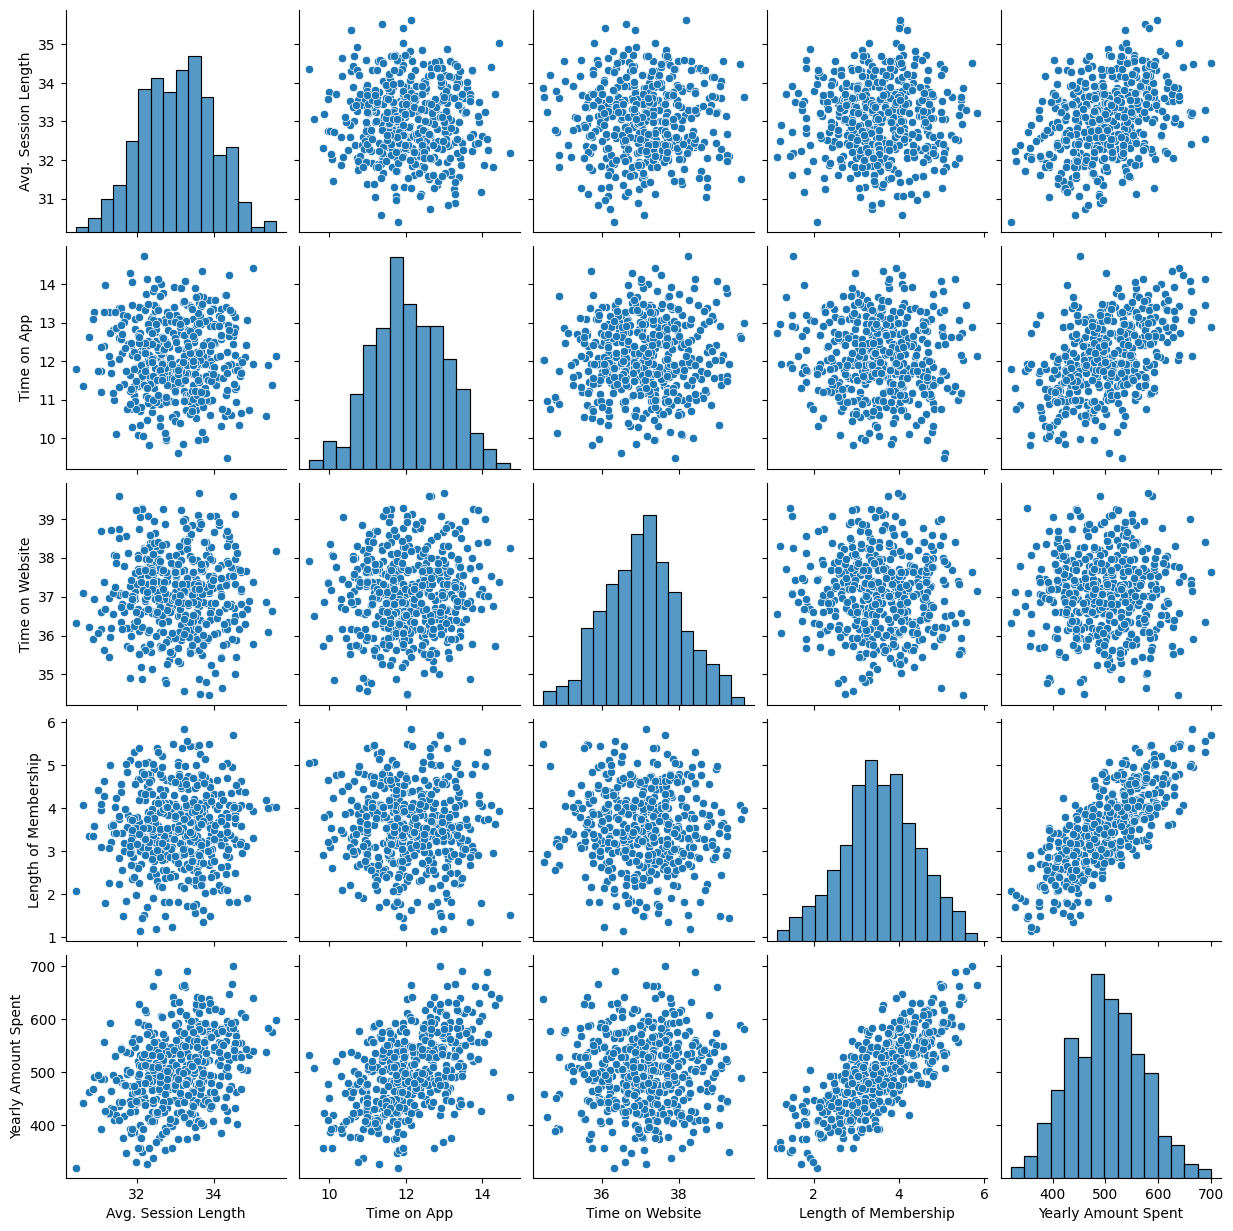

In [46]:
sns.pairplot(df)
plt.show()

###  由上面的矩阵图表的可以看出来图表呈现正态分布，接下来分析是移动端还是pc端更加赚钱

In [47]:
# 计算字段之间的相关性
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.038177,-0.004834,0.013809,0.339804
Time on App,-0.038177,1.000000,0.065210,-0.054382,0.475560
Time on Website,-0.004834,0.065210,1.000000,-0.046572,0.000581
Length of Membership,0.013809,-0.054382,-0.046572,1.000000,0.767651
Yearly Amount Spent,0.339804,0.475560,0.000581,0.767651,1.000000


<Axes: >

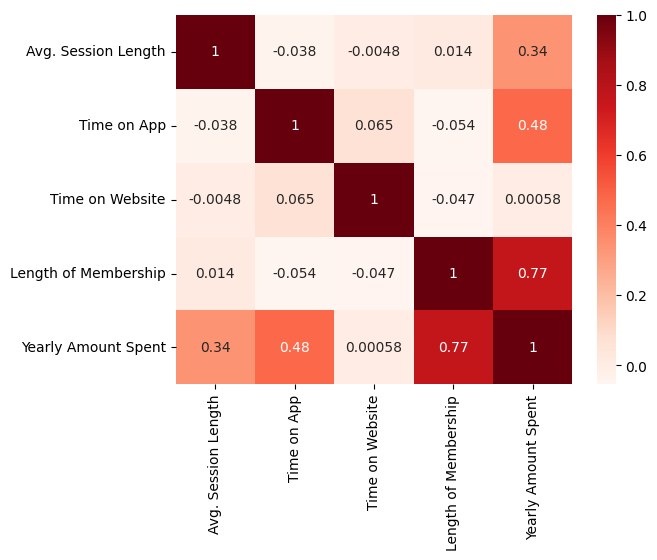

In [49]:
# 绘制相关性热力图
sns.heatmap(df.corr(),cmap='Reds',annot=True)

## 总结：从热力图中可以看出，Yearly Amount Spent（年度消费）与 Time on App（移动APP端）的相关性达到48%，而与Time on Website（PC端）仅仅才0.058%；显而易见这种情况下更加注重移动端app